<a href="https://colab.research.google.com/github/yudhiesh1997/RedWineQuality/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn 
import seaborn as sns 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold, train_test_split
import tensorflow as tf
from tensorflow.keras.optimizers import *
from keras import Sequential
from keras.layers import Dense 
from keras import metrics
import matplotlib as mpl

In [ ]:
df = pd.read_csv("/content/drive/My Drive/winequality-red 3.csv")
print(df.columns)
columns_ = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'quality']
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
one_hot = pd.get_dummies(df.quality)

In [ ]:
df = pd.concat([df, one_hot], axis=1)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,3,4,5,6,7,8
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0,1,0,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,0,1,0,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,0,1,0,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,0,0,1,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0,1,0,0,0


In [ ]:
df.drop(columns=["quality"], inplace=True)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,3,4,5,6,7,8
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0,1,0,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0,1,0,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0,1,0,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,0,0,1,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0,1,0,0,0


In [ ]:
scaler = StandardScaler()

def scale_features(features, df):
  df[features] = scaler.fit_transform(df[features])

In [ ]:
scale_features(features=features, df=df)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,3,4,5,6,7,8
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0,0,1,0,0,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0,0,1,0,0,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0,0,1,0,0,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0,0,0,1,0,0
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0,0,1,0,0,0


In [ ]:
df.iloc[:, 0:11]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [ ]:
X = df.iloc[:, 0:11]
Y = df.iloc[:, -6:]

In [ ]:
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_auc_ = logs["val_auc"]
        if val_auc_ >= self.threshold:
            self.model.stop_training = True

callback = MyThresholdCallback(threshold=.99)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(1279, 11) (1279, 6) (320, 11) (320, 6)


## As this is a multiclass classification problem the evaluation will be based more on factors such as the AUC, precision, recall and the loss of the model over the actual accuracy of it. 

## The models differ in the number of layers 

## The learning rate which is basically the amount the model moves at each iteration when finding the global minima is kept at 0.001. 

## When the learning rate was increased it was noted that the model did not converge and outputted a NaN error to indicate that the model was suffering from exploding gradients. 

In [ ]:
METRICS = [
      metrics.TruePositives(name='tp'),
      metrics.FalsePositives(name='fp'),
      metrics.TrueNegatives(name='tn'),
      metrics.FalseNegatives(name='fn'), 
      metrics.BinaryAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall'),
      metrics.AUC(name='auc'),
]

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu,input_shape=(11,)), 
                                    tf.keras.layers.Dropout(rate=0.8),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(rate=0.5),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(6, activation=tf.nn.softmax)])

model2 = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu,input_shape=(11,)), 
                                    tf.keras.layers.Dropout(rate=0.8),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(rate=0.5),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(rate=0.5),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(6, activation=tf.nn.softmax)])

model3 = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu,input_shape=(11,)), 
                                    tf.keras.layers.Dropout(rate=0.8),
                                     tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(rate=0.5),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(rate=0.5),
                                     tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(rate=0.5),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(6, activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss="categorical_crossentropy",
              metrics=METRICS)
model2.compile(optimizer=Adam(learning_rate=0.001), 
              loss="categorical_crossentropy",
              metrics=METRICS)
model3.compile(optimizer=Adam(learning_rate=0.001), 
              loss="categorical_crossentropy",
              metrics=METRICS)

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 256)               3072      
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_37 (Dense)             (None, 6)                 390       
Total params: 44,614
Trainable params: 44,614
Non-trainable params: 0
__________________________________________________

In [ ]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 512)               6144      
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_23 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 64)               

In [ ]:
model3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 1024)              12288     
_________________________________________________________________
dropout_25 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_27 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 128)              

In [ ]:
history1 = model.fit(X_train, Y_train,validation_split=0.2, epochs=200, verbose=2, callbacks=[callback])

Epoch 1/200
32/32 - 1s - loss: 0.8384 - tp: 581.0000 - fp: 298.0000 - tn: 6417.0000 - fn: 762.0000 - accuracy: 0.8685 - precision: 0.6610 - recall: 0.4326 - auc: 0.8669 - val_loss: 0.9193 - val_tp: 130.0000 - val_fp: 77.0000 - val_tn: 1203.0000 - val_fn: 126.0000 - val_accuracy: 0.8678 - val_precision: 0.6280 - val_recall: 0.5078 - val_auc: 0.9097
Epoch 2/200
32/32 - 0s - loss: 0.8276 - tp: 578.0000 - fp: 286.0000 - tn: 4829.0000 - fn: 445.0000 - accuracy: 0.8809 - precision: 0.6690 - recall: 0.5650 - auc: 0.9260 - val_loss: 0.9215 - val_tp: 131.0000 - val_fp: 81.0000 - val_tn: 1199.0000 - val_fn: 125.0000 - val_accuracy: 0.8659 - val_precision: 0.6179 - val_recall: 0.5117 - val_auc: 0.9098
Epoch 3/200
32/32 - 0s - loss: 0.8084 - tp: 600.0000 - fp: 280.0000 - tn: 4835.0000 - fn: 423.0000 - accuracy: 0.8855 - precision: 0.6818 - recall: 0.5865 - auc: 0.9284 - val_loss: 0.9259 - val_tp: 139.0000 - val_fp: 78.0000 - val_tn: 1202.0000 - val_fn: 117.0000 - val_accuracy: 0.8730 - val_precisi

In [ ]:
history2 = model2.fit(X_train, Y_train,validation_split=0.2, epochs=200, verbose=2, callbacks=[callback])

Epoch 1/200
32/32 - 1s - loss: 1.4386 - tp: 275.0000 - fp: 228.0000 - tn: 6167.0000 - fn: 1004.0000 - accuracy: 0.8395 - precision: 0.5467 - recall: 0.2150 - auc: 0.8215 - val_loss: 1.2295 - val_tp: 2.0000 - val_fp: 4.0000 - val_tn: 1276.0000 - val_fn: 254.0000 - val_accuracy: 0.8320 - val_precision: 0.3333 - val_recall: 0.0078 - val_auc: 0.8597
Epoch 2/200
32/32 - 0s - loss: 1.2244 - tp: 242.0000 - fp: 200.0000 - tn: 4915.0000 - fn: 781.0000 - accuracy: 0.8402 - precision: 0.5475 - recall: 0.2366 - auc: 0.8465 - val_loss: 1.1078 - val_tp: 57.0000 - val_fp: 17.0000 - val_tn: 1263.0000 - val_fn: 199.0000 - val_accuracy: 0.8594 - val_precision: 0.7703 - val_recall: 0.2227 - val_auc: 0.8864
Epoch 3/200
32/32 - 0s - loss: 1.1720 - tp: 300.0000 - fp: 223.0000 - tn: 4892.0000 - fn: 723.0000 - accuracy: 0.8459 - precision: 0.5736 - recall: 0.2933 - auc: 0.8659 - val_loss: 1.0508 - val_tp: 74.0000 - val_fp: 30.0000 - val_tn: 1250.0000 - val_fn: 182.0000 - val_accuracy: 0.8620 - val_precision: 

In [ ]:
history3 = model3.fit(X_train, Y_train,validation_split=0.2, epochs=200, verbose=2, callbacks=[callback])

Epoch 1/200
32/32 - 1s - loss: 1.3757 - tp: 309.0000 - fp: 268.0000 - tn: 6127.0000 - fn: 970.0000 - accuracy: 0.8387 - precision: 0.5355 - recall: 0.2416 - auc: 0.8348 - val_loss: 1.1893 - val_tp: 22.0000 - val_fp: 6.0000 - val_tn: 1274.0000 - val_fn: 234.0000 - val_accuracy: 0.8438 - val_precision: 0.7857 - val_recall: 0.0859 - val_auc: 0.8736
Epoch 2/200
32/32 - 0s - loss: 1.2282 - tp: 214.0000 - fp: 199.0000 - tn: 4916.0000 - fn: 809.0000 - accuracy: 0.8358 - precision: 0.5182 - recall: 0.2092 - auc: 0.8455 - val_loss: 1.0878 - val_tp: 60.0000 - val_fp: 23.0000 - val_tn: 1257.0000 - val_fn: 196.0000 - val_accuracy: 0.8574 - val_precision: 0.7229 - val_recall: 0.2344 - val_auc: 0.8875
Epoch 3/200
32/32 - 0s - loss: 1.1591 - tp: 303.0000 - fp: 229.0000 - tn: 4886.0000 - fn: 720.0000 - accuracy: 0.8454 - precision: 0.5695 - recall: 0.2962 - auc: 0.8643 - val_loss: 1.0470 - val_tp: 77.0000 - val_fp: 38.0000 - val_tn: 1242.0000 - val_fn: 179.0000 - val_accuracy: 0.8587 - val_precision: 

In [ ]:
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall']
  colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
  mpl.rcParams['figure.figsize'] = (12, 10)
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

Model 1


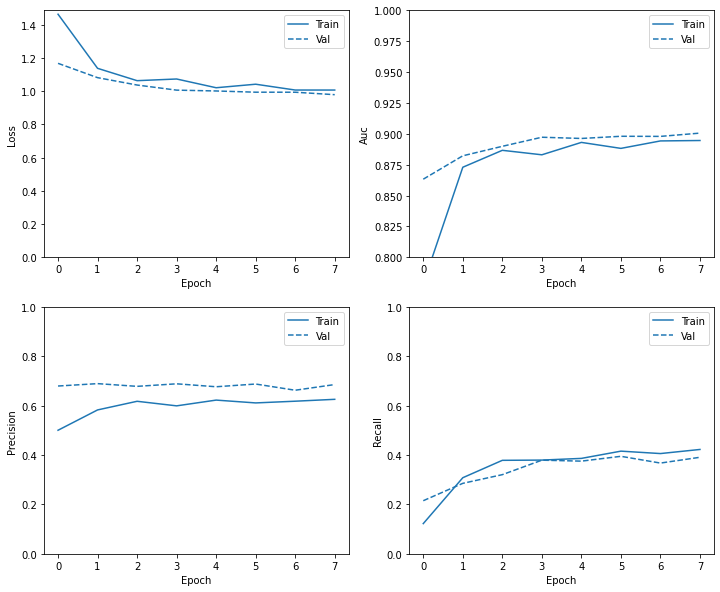

In [ ]:
print("Model 1")
plot_metrics(history)

Model 2


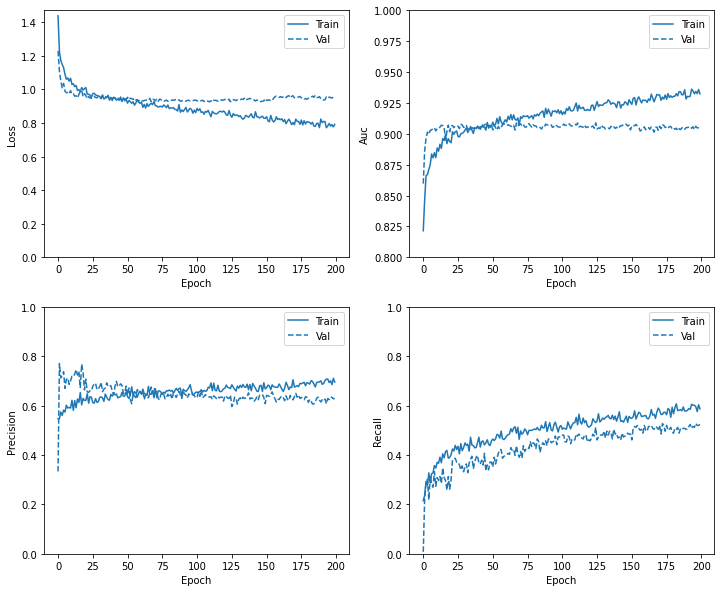

In [ ]:
print("Model 2")
plot_metrics(history2)

Model 3


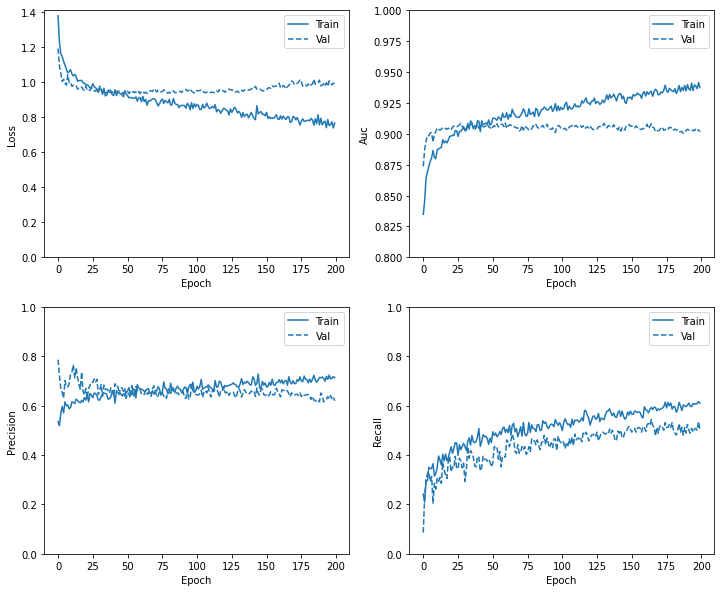

In [ ]:
print("Model 3")
plot_metrics(history3)

# Evaluation on 3 models 

## All the models perform about the same as each other with an AUC score of 0.9 on both the train and the validation sets. 

## Although all the models might seem like they are sligthly overfitting the dataset, the models are actually fitting it well as all three models have heavy dropout applied to them which is a form of regularization to reduce overfitting, when performing the validation set of the model dropout is not considered as well as any type of regularizer. This explains why the validation performs better on some the models. 

## With that the model which would fit the data best would have the lowest amount of difference from the train and validation dataset. 

## Based on this the first model has the closest performance on both train and validation compared to the other 2 models. In the other two models, even with heavy dropout being excluded during the validation portion the train portion does better in instances such as AUC and Loss. With model 2 and model 3 having large differences between the metrics for their training and validation.

## Therefore the first model will be chosen as it seems to fit the data the best. 

In [ ]:
pred = model.evaluate(X_test, Y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.8660 - tp: 209.0000 - fp: 78.0000 - tn: 1522.0000 - fn: 111.0000 - accuracy: 0.9016 - precision: 0.7282 - recall: 0.6531 - auc: 0.9241


In [ ]:
metrics_= ['Loss', "True Positives", "False Positives", "True Negatives", "False Negatives", "Accuracy", "Precision", "Recall", "AUC"]

for p, m in zip(pred,metrics_):
  print(f'{m} : {p}')


Loss : 0.865960419178009
True Positives : 209.0
False Positives : 78.0
True Negatives : 1522.0
False Negatives : 111.0
Accuracy : 0.901562511920929
Precision : 0.7282230257987976
Recall : 0.653124988079071
AUC : 0.9240624308586121


## Overall the model has a percision of 0.73, recall of 0.65, F1 score of 0.69 and an AUC of 0.92 which is great for this unbalanced dataset.

## A model with a AUC of 1.00 would be a perfect model for a classification problem and this one is able to achieve a somewhat similar score of 0.92.